source: https://teamspace.itri.org.tw/sites/icl_0x000/_layouts/15/WopiFrame.aspx?sourcedoc=/sites/icl_0x000/X/%E6%8A%80%E8%A1%93%E5%88%86%E4%BA%AB%E6%9C%83/20171110/redeep_%E6%B1%AA%E5%BF%83%E5%A8%81.pptx&action=default

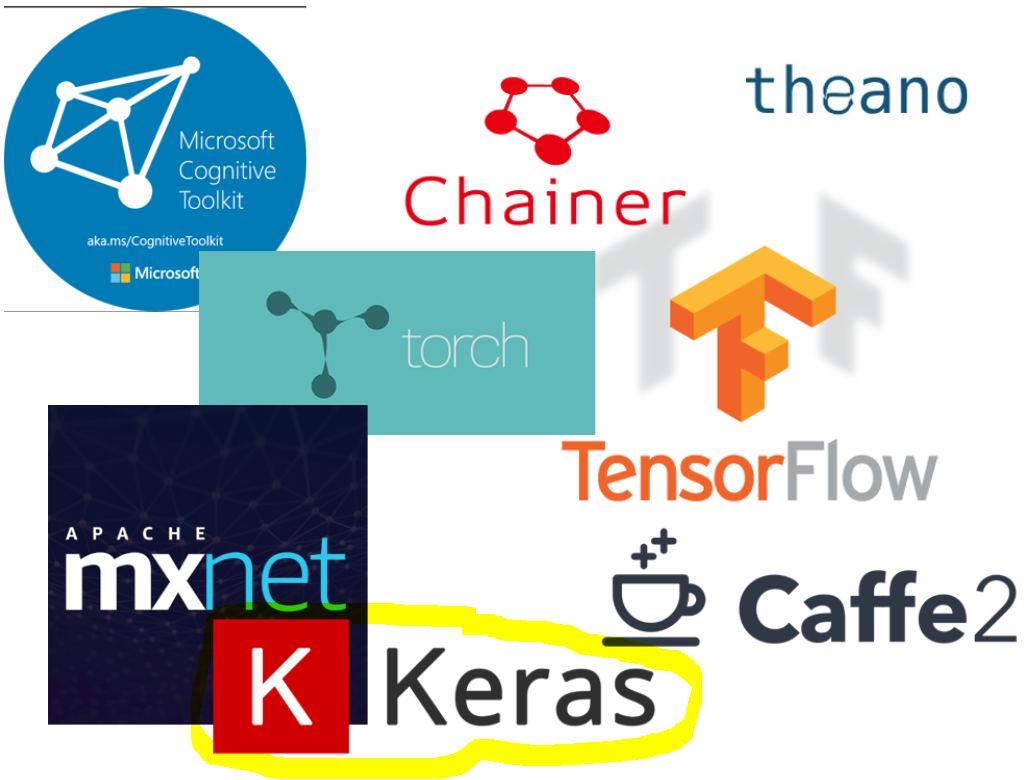

## 先從最簡單的 binary classification 開始
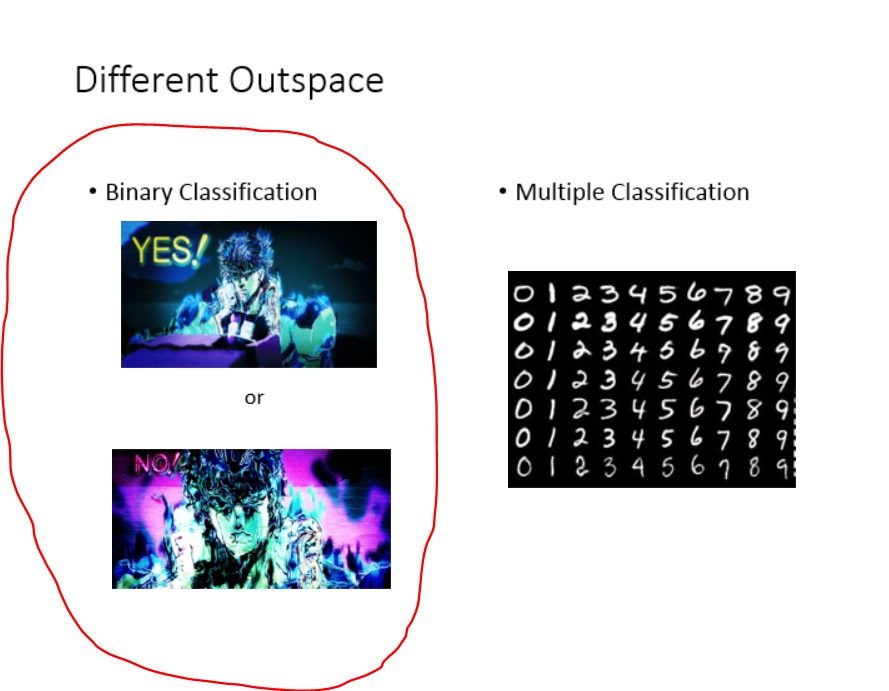

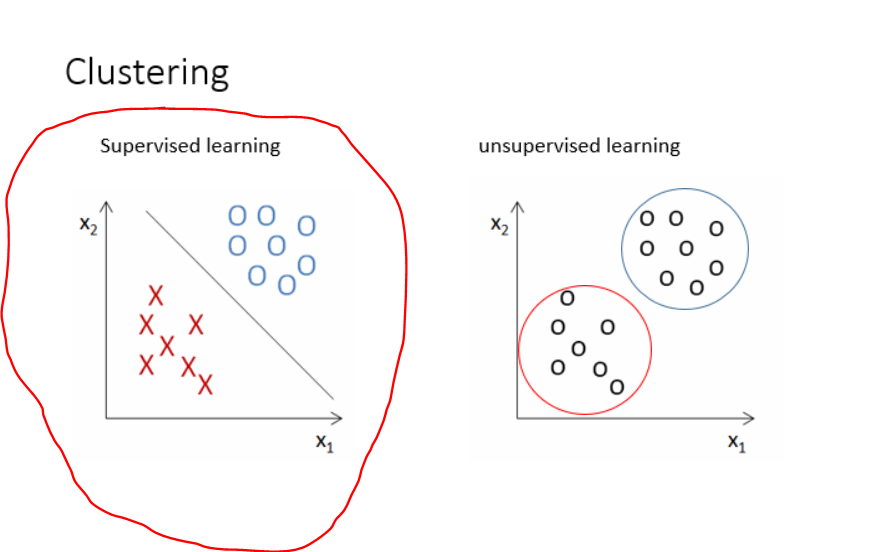

* input: x1(身高), x2(年收入)
* output: y(有沒有女朋友)
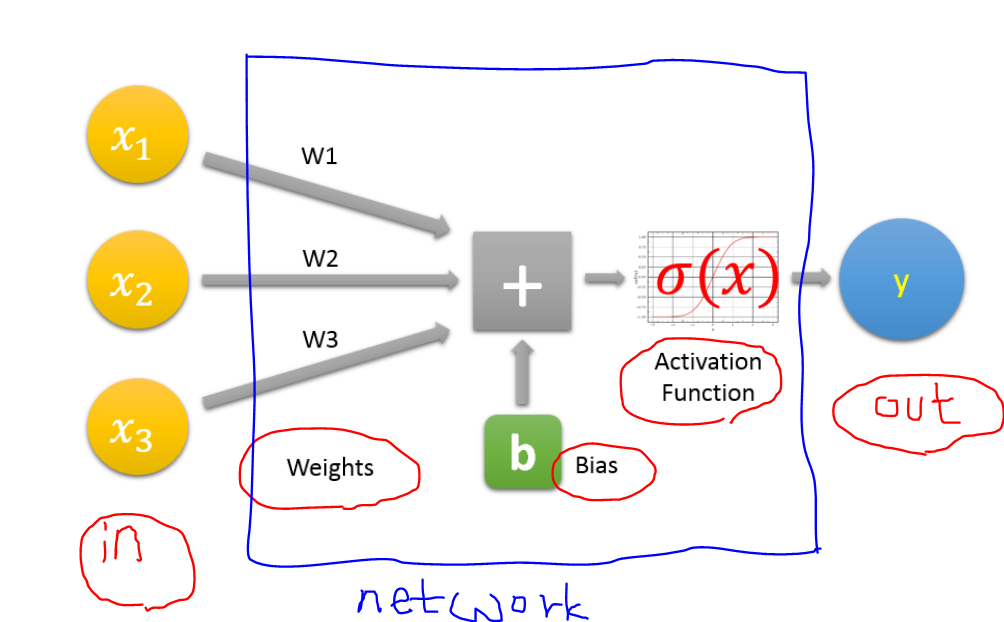

## 開始 coding

* 準備 input and output data

data: 500
label: 500


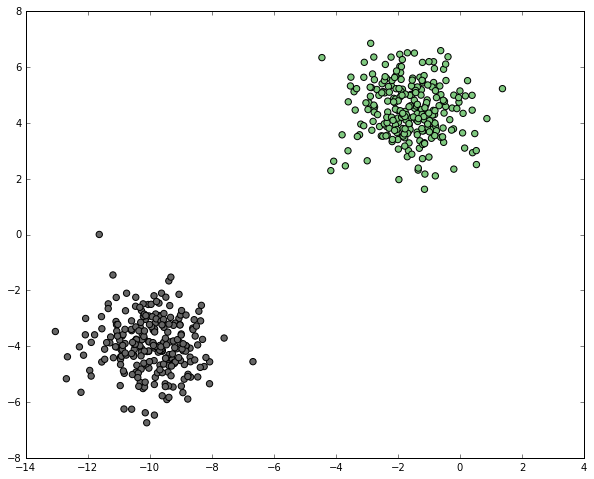

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

data, label = make_blobs(n_samples=500, centers=2, random_state=1)
print("data: %r" % (len(data)))
print("label: %r" % (len(label)))
# draw picture
plt.scatter(data[:,0], data[:,1], s=40, c=label, cmap=plt.cm.Accent)

## 規劃 network(model)

1. 幾層 layer?  => 從最簡單的開始 1 layer
2. 要用什麼 layer?  => 全連接層
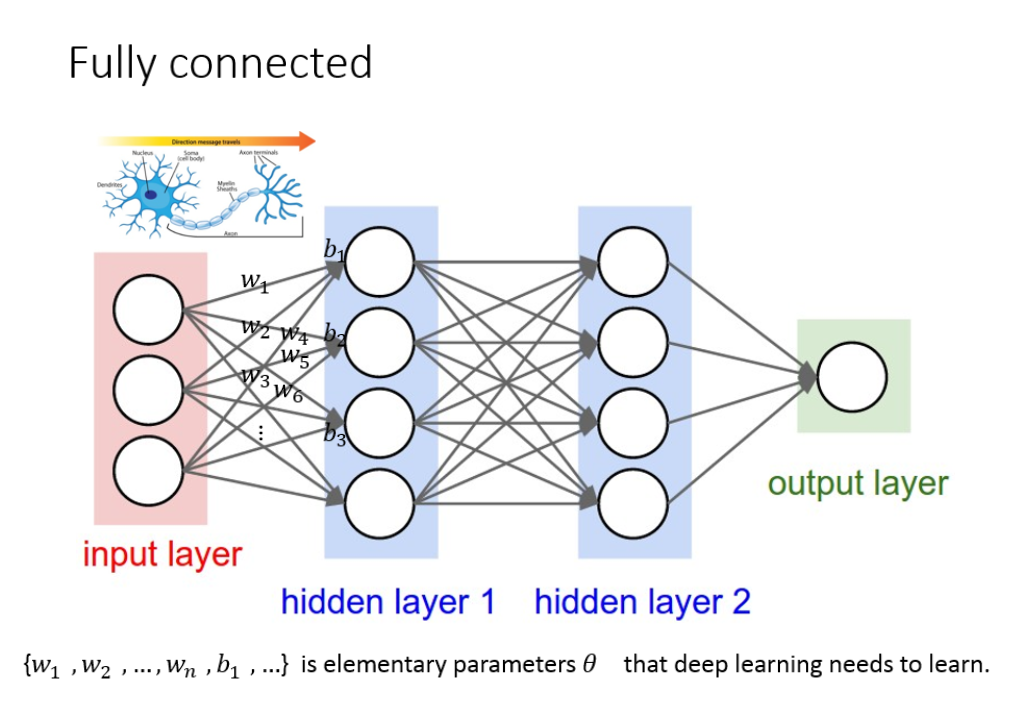

3 選擇 activation function?  => sigmoid, 因為 output 在 (0, 1) 之間
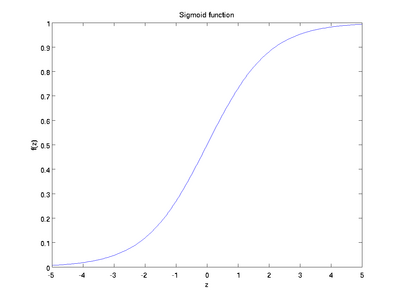

4 選擇 loss function?   => mean square error (先選簡單的)
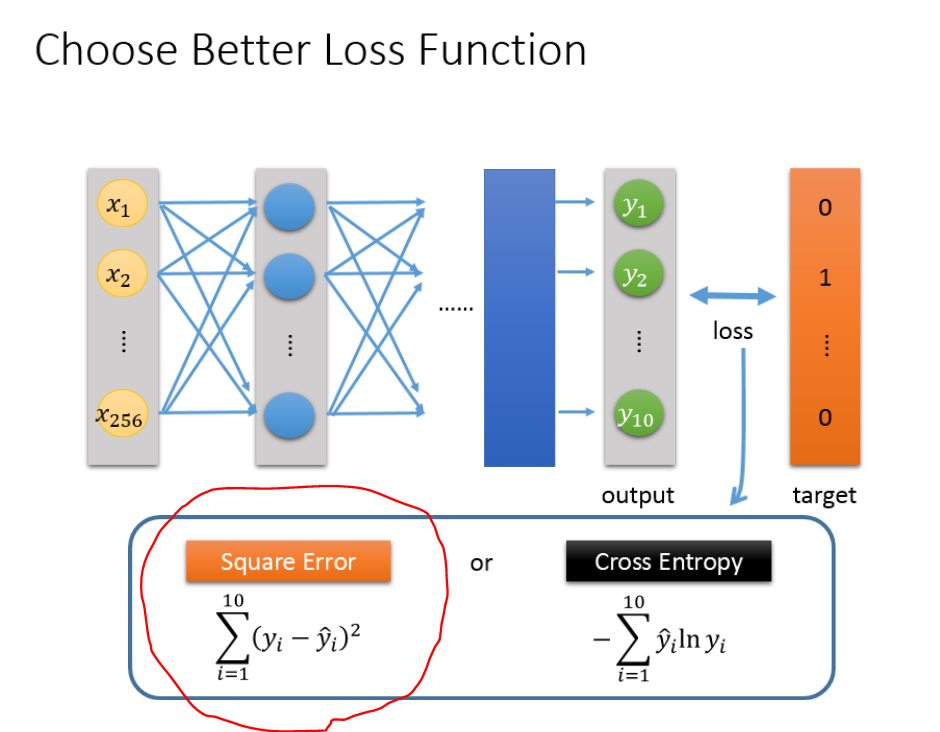

5 選擇 optimizer?  => Stochastic Gradient Descent
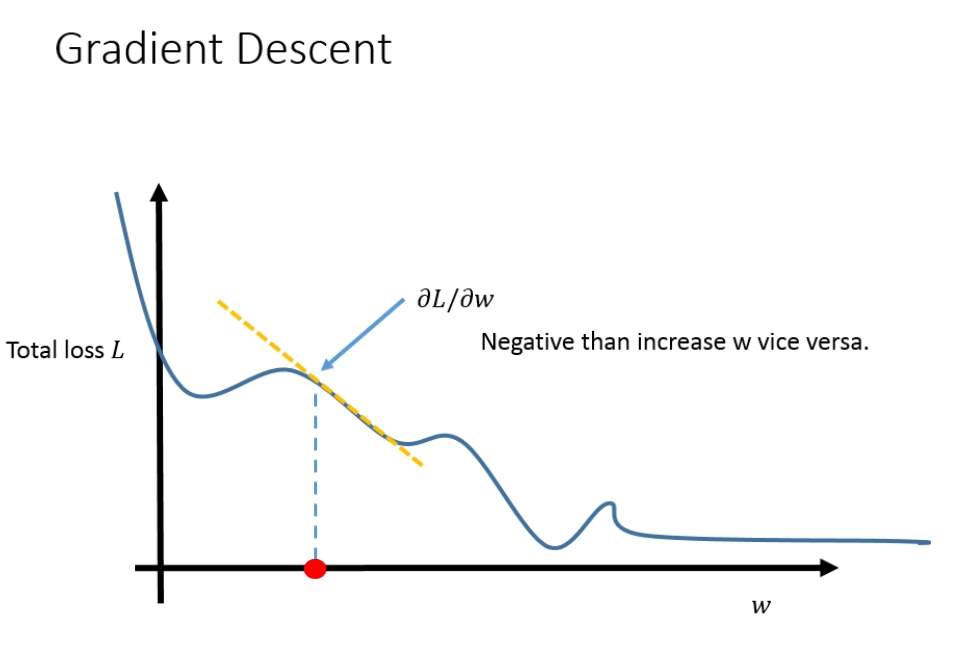

Layer len:1


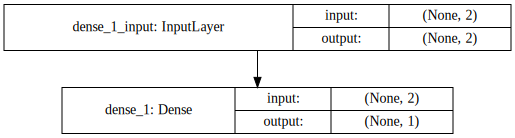

In [2]:
model = Sequential()
# 1.加入1layer, 2.全連接層, 3.activation func.(sigmoid)
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))
# 4.loss func.(mse), 5.optimizer(sgd)
model.compile(optimizer='sgd', loss='mse') # 'binary_crossentropy'

#model.summary()

print("Layer len:%d" % (len(model.layers)))
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [3]:
def accuary(label, result):
    cnt = 0;
    for i in range(0, len(label)):
        if (float(label[i]) == result[i][0]):
            cnt += 1;
        else:
            pass;
            #print("i:%d label[i]=%r result[i][0]:%r" % (i, label[i], result[i][0]))
    #print("equal cnt=%d" % (cnt))
    return (float(cnt) / label.shape[0]);

def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    pred_every_point = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(pred_every_point)
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

## 開始訓練 network
1. 選擇 batch
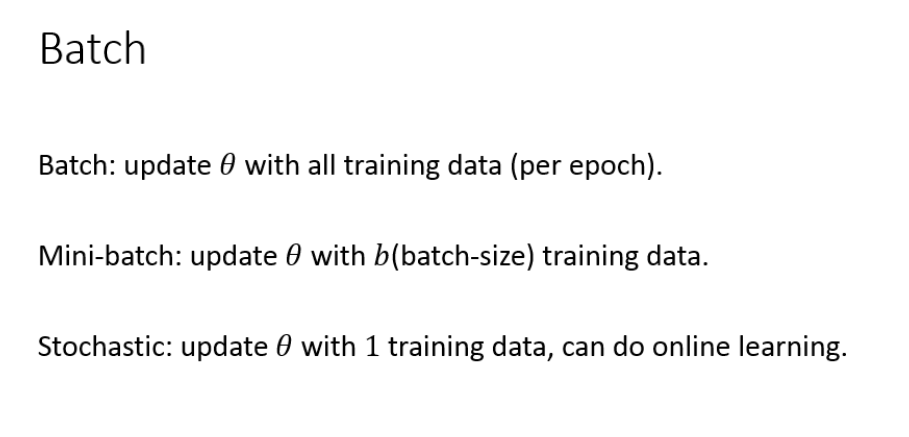

* epoch: one forward pass and one backward pass of all the training examples
  (白話文)希望做幾次的訓練

In [4]:
model.fit(data, label, epochs=400, verbose=1)    # batch_size = 500

Epoch 1/400
500/500 [==============================] - 0s 170us/step - loss: 0.9730
Epoch 2/400
500/500 [==============================] - 0s 39us/step - loss: 0.9715
Epoch 3/400
500/500 [==============================] - 0s 41us/step - loss: 0.9697
Epoch 4/400
500/500 [==============================] - 0s 47us/step - loss: 0.9677
Epoch 5/400
500/500 [==============================] - 0s 41us/step - loss: 0.9654
Epoch 6/400
500/500 [==============================] - 0s 44us/step - loss: 0.9629
Epoch 7/400
500/500 [==============================] - 0s 40us/step - loss: 0.9598
Epoch 8/400
500/500 [==============================] - 0s 40us/step - loss: 0.9563
Epoch 9/400
500/500 [==============================] - 0s 39us/step - loss: 0.9521
Epoch 10/400
500/500 [==============================] - 0s 41us/step - loss: 0.9470
Epoch 11/400
500/500 [==============================] - 0s 53us/step - loss: 0.9409
Epoch 12/400
500/500 [==============================] - 0s 42us/step - loss: 0.9331


500/500 [==============================] - 0s 45us/step - loss: 0.0017
Epoch 195/400
500/500 [==============================] - 0s 48us/step - loss: 0.0016
Epoch 196/400
500/500 [==============================] - 0s 40us/step - loss: 0.0016
Epoch 197/400
500/500 [==============================] - 0s 44us/step - loss: 0.0015
Epoch 198/400
500/500 [==============================] - 0s 42us/step - loss: 0.0015
Epoch 199/400
500/500 [==============================] - 0s 43us/step - loss: 0.0015
Epoch 200/400
500/500 [==============================] - 0s 41us/step - loss: 0.0014
Epoch 201/400
500/500 [==============================] - 0s 40us/step - loss: 0.0014
Epoch 202/400
500/500 [==============================] - 0s 46us/step - loss: 0.0014
Epoch 203/400
500/500 [==============================] - 0s 46us/step - loss: 0.0013
Epoch 204/400
500/500 [==============================] - 0s 46us/step - loss: 0.0013
Epoch 205/400
500/500 [==============================] - 0s 42us/step - loss: 0

500/500 [==============================] - 0s 39us/step - loss: 5.6042e-04
Epoch 380/400
500/500 [==============================] - 0s 41us/step - loss: 5.5922e-04
Epoch 381/400
500/500 [==============================] - 0s 40us/step - loss: 5.5798e-04
Epoch 382/400
500/500 [==============================] - 0s 43us/step - loss: 5.5678e-04
Epoch 383/400
500/500 [==============================] - 0s 42us/step - loss: 5.5550e-04
Epoch 384/400
500/500 [==============================] - 0s 43us/step - loss: 5.5428e-04
Epoch 385/400
500/500 [==============================] - 0s 44us/step - loss: 5.5311e-04
Epoch 386/400
500/500 [==============================] - 0s 42us/step - loss: 5.5194e-04
Epoch 387/400
500/500 [==============================] - 0s 41us/step - loss: 5.5083e-04
Epoch 388/400
500/500 [==============================] - 0s 40us/step - loss: 5.4965e-04
Epoch 389/400
500/500 [==============================] - 0s 45us/step - loss: 5.4847e-04
Epoch 390/400
500/500 [============

## 預測
* 看看結果如何?

Accuary:1.000000


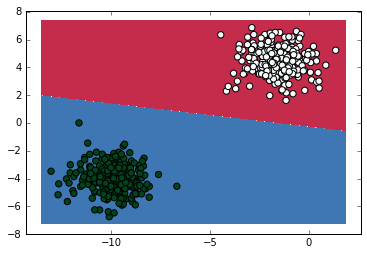

In [5]:
result = model.predict(data)
result[result >= 0.5] = 1
result[result < 0.5] = 0

print("Accuary:%f" % (accuary(label, result)))
plot_decision_boundary(data, label, model)

## [next_part_2](%E5%BE%9E%E9%9B%B6%E9%96%8B%E5%A7%8B%E7%9A%84%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92_%E7%AF%84%E4%BE%8B%E7%AF%87_part_2.ipynb)